<a href="https://www.kaggle.com/code/dikabdullah/notebookacea423c60?scriptVersionId=197353746" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# VERİ SETİ HAKKINDA

property_type Bu bölümde altı farklı türümüz var:

Ev
Çiftlik Evi
Üst Kısım
Alt Kısım
Daire
Oda
Fiyat Fiyat, bu veri setinde bağımlı bir özellik/parametredir.

City; Bu veri setinde toplam şehir sayısı beştir:

Lahor
Karaçi
Faisalabad
Rawalpindi
İslamabad

Location parametresi her şehirdeki farklı konum türleriyle ilgilidir.
bedrooms parametresi evin yatak odası sayısı.
baths parametresi evin tuvalet sayısı.
price parameteresi Fiyat.
purpose parametresi ise satıldığını mı yoksa kiralandı mı onu gösterir.


In [219]:
import numpy as np 
import pandas as pd 

In [220]:
df=pd.read_csv('/kaggle/input/house-prices-2023-dataset/Cleaned_data_for_model.csv')

In [221]:
df

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


# GEREKSİZ SÜTUN SİLME
> Unnamed:0 isimli sütunu kaldırıyoruz. Veride gereksiz yer kaplıyor.

In [222]:
df.drop(columns=['Unnamed: 0'],inplace = True)

# NUMERICAL EDA

In [223]:
df.head().T

,0,1,2,3,4
property_type,Flat,Flat,House,House,House
price,10000000,6900000,16500000,43500000,7000000
location,G-10,E-11,G-15,Bani Gala,DHA Defence
city,Islamabad,Islamabad,Islamabad,Islamabad,Islamabad
baths,2,3,6,4,3
purpose,For Sale,For Sale,For Sale,For Sale,For Sale
bedrooms,2,3,5,4,3
Area_in_Marla,4.0,5.6,8.0,40.0,8.0


In [224]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,99499.0,1.037592e+07,1.066000e+07,15500.0,150000.0,7500000.0,15500000.0,44900000.0
baths,99499.0,3.530106e+00,1.474217e+00,1.0,2.0,3.0,5.0,7.0
bedrooms,99499.0,3.350737e+00,1.255913e+00,0.0,2.0,3.0,4.0,6.0
Area_in_Marla,99499.0,8.757479e+00,7.466471e+00,0.0,4.8,6.7,10.0,194.0


In [225]:
print(df.dtypes)

property_type     object
price              int64
location          object
city              object
baths              int64
purpose           object
bedrooms           int64
Area_in_Marla    float64
dtype: object


In [226]:
df.shape

(99499, 8)

# VISUAL EDA

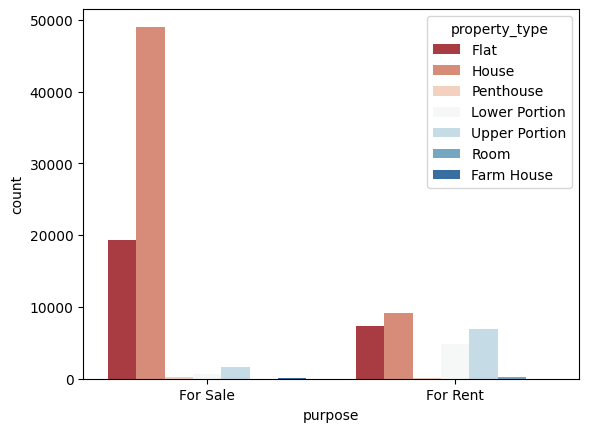

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x='purpose', hue='property_type', data=df, palette='RdBu')
plt.show()

<Figure size 640x480 with 0 Axes>

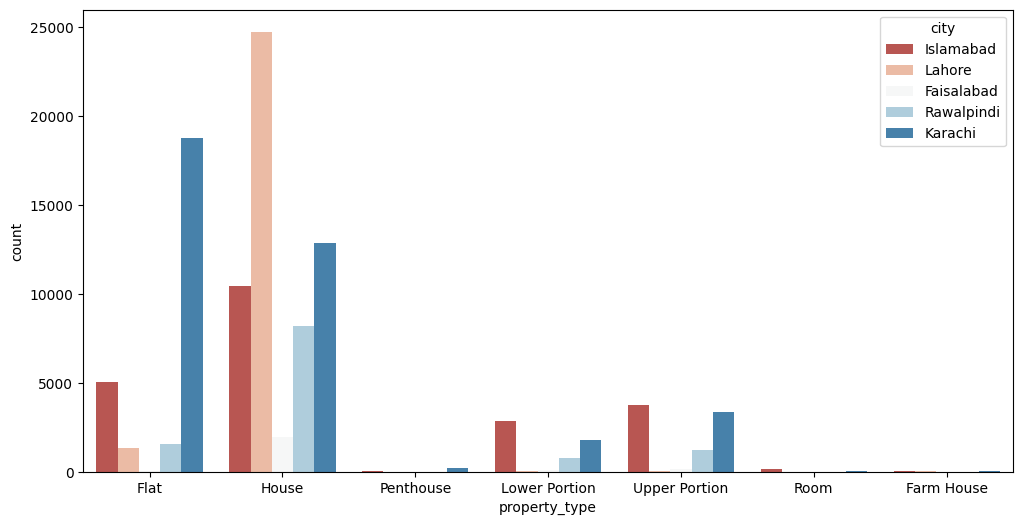

In [228]:
plt.figure()
plt.figure(figsize=(12, 6))
sns.countplot(x='property_type', hue='city', data=df, palette='RdBu')
plt.show()

# KATEGORİK VERİLERİ NUMERİK DEĞERLERE ÇEVİRME

In [229]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])
df['property_type'] = le.fit_transform(df['property_type'])
df['location'] = le.fit_transform(df['location'])
df['city'] = le.fit_transform(df['city'])

# KORELASYON MATRİSİ

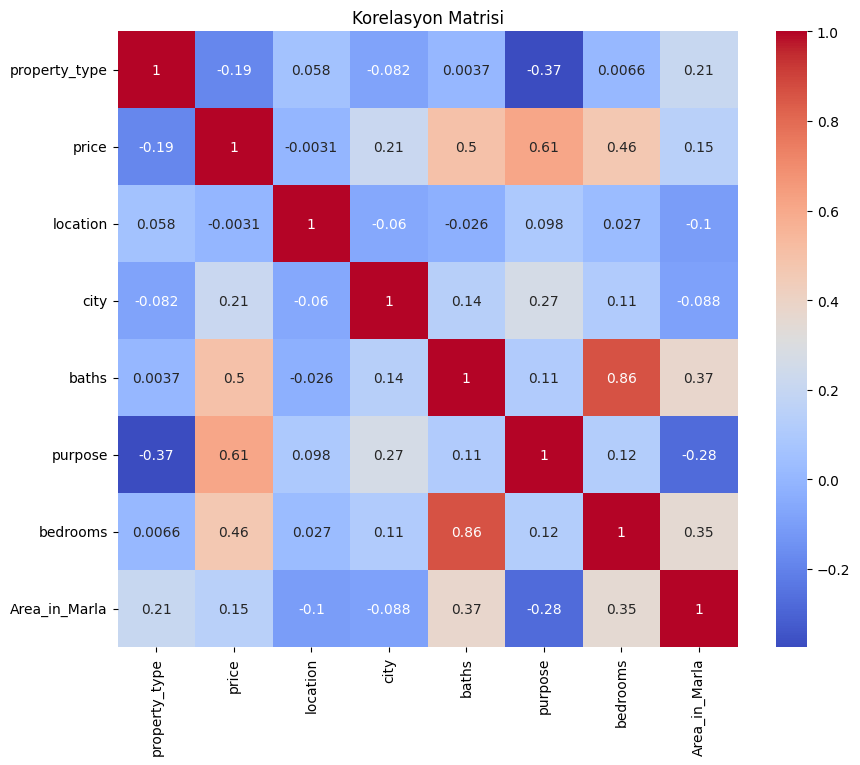

In [230]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

# VERİ ÖNİŞLEME

In [231]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [232]:
X=df.drop(columns=['price'])
y=df['price']

In [233]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2,4])],remainder='passthrough')
X=ct.fit_transform(X)

In [234]:
y_log = np.log(y)

In [235]:
X_train,X_test,y_train,y_test = train_test_split(X,y_log,test_size = 0.2,random_state = 42)

In [236]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 556947 stored elements and shape (79599, 1406)>

# LINEER REGRESYON

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [238]:
model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
mae1 = mean_absolute_error(y_test, pred)
mse1 = mean_squared_error(y_test, pred)
rmse1 = np.sqrt(mse1)
r21 = r2_score(y_test, pred)
print("Mean Absolute Error:", mae1)
print("Mean Squared Error:", mse1)
print("Root Mean Squared Error:", rmse1)
print("R² Score:", r21)

Mean Absolute Error: 0.2710990741293061
Mean Squared Error: 0.1547421346443654
Root Mean Squared Error: 0.3933727680513299
R² Score: 0.9752984804700517


# ADABOOST REGRESSOR

In [239]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_model=AdaBoostRegressor(n_estimators=20,
                                 learning_rate=0.1,
                                 loss='square')
adaboost_model.fit(X_train,y_train)
ada_pred=adaboost_model.predict(X_test)
mae2 = mean_absolute_error(y_test, ada_pred)
mse2 = mean_squared_error(y_test, ada_pred)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test, ada_pred)
print("Mean Absolute Error:", mae2)
print("Mean Squared Error:", mse2)
print("Root Mean Squared Error:", rmse2)
print("R² Score:", r22)

Mean Absolute Error: 0.38399484402495465
Mean Squared Error: 0.2533932982502965
Root Mean Squared Error: 0.503381861264683
R² Score: 0.9595507744553684


# GRADIENT BOOSTING REGRESSOR

In [240]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost_model=GradientBoostingRegressor(learning_rate=1.0,
                                               n_estimators=20,
                                               max_depth=5,
                                               min_samples_leaf=5
                                               )
gradient_boost_model.fit(X_train,y_train)
gbr_pred=gradient_boost_model.predict(X_test)
mae3 = mean_absolute_error(y_test, gbr_pred)
mse3 = mean_squared_error(y_test, gbr_pred)
rmse3 = np.sqrt(mse3)
r23 = r2_score(y_test, gbr_pred)
print("Mean Absolute Error:", mae3)
print("Mean Squared Error:", mse3)
print("Root Mean Squared Error:", rmse3)
print("R² Score:", r23)

Mean Absolute Error: 0.23400555448332447
Mean Squared Error: 0.11867885469373271
Root Mean Squared Error: 0.34449797487609807
R² Score: 0.9810552694406954


# XGBOOST

In [241]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)
mae4 = mean_absolute_error(y_test, xgb_pred)
mse4 = mean_squared_error(y_test, xgb_pred)
rmse4 = np.sqrt(mse4)
r24 = r2_score(y_test, xgb_pred)
print("Mean Absolute Error:", mae4)
print("Mean Squared Error:", mse4)
print("Root Mean Squared Error:", rmse4)
print("R² Score:", r24)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:41:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Mean Absolute Error: 0.20939244972068063
Mean Squared Error: 0.098913827824208
Root Mean Squared Error: 0.31450568806336077
R² Score: 0.9842103648408563


# ERROR DEĞERLERİNİN 0'A DAHA YAKIN OLMASI VE R² DEĞERİNİN DE 1'E EN YAKIN OLANI XGBOOST ALGORİTMASIDIR.

# VERİ STANDARDİZASYONU

In [242]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [243]:
scaled_data

array([[-0.87253   , -0.03526468, -0.19680575, ...,  0.63438258,
        -1.07550747, -0.63718226],
       [-0.87253   , -0.32607294, -0.40081855, ...,  0.63438258,
        -0.27927007, -0.42288986],
       [-0.10832604,  0.57449459, -0.18223341, ...,  0.63438258,
         1.31320472, -0.10145124],
       ...,
       [-0.10832604,  0.33997179, -0.96331096, ...,  0.63438258,
        -0.27927007, -0.10145124],
       [-0.10832604,  0.33997179, -0.96331096, ...,  0.63438258,
         0.51696733,  0.70214528],
       [-0.10832604, -0.12907379, -0.96331096, ...,  0.63438258,
        -0.27927007,  0.08605461]])

# MINI BATCH K-MEANS

In [244]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=5, n_init='auto' )
model.fit(scaled_data)

MiniBatchKMeans(batch_size=5, n_clusters=3, n_init='auto', random_state=42)

In [245]:
labels = model.predict(scaled_data)
centroids = model.cluster_centers_

/tmp/ipykernel_36/2509415150.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['property_type'], df['price'], cmap='viridis', s=50, alpha=0.6)


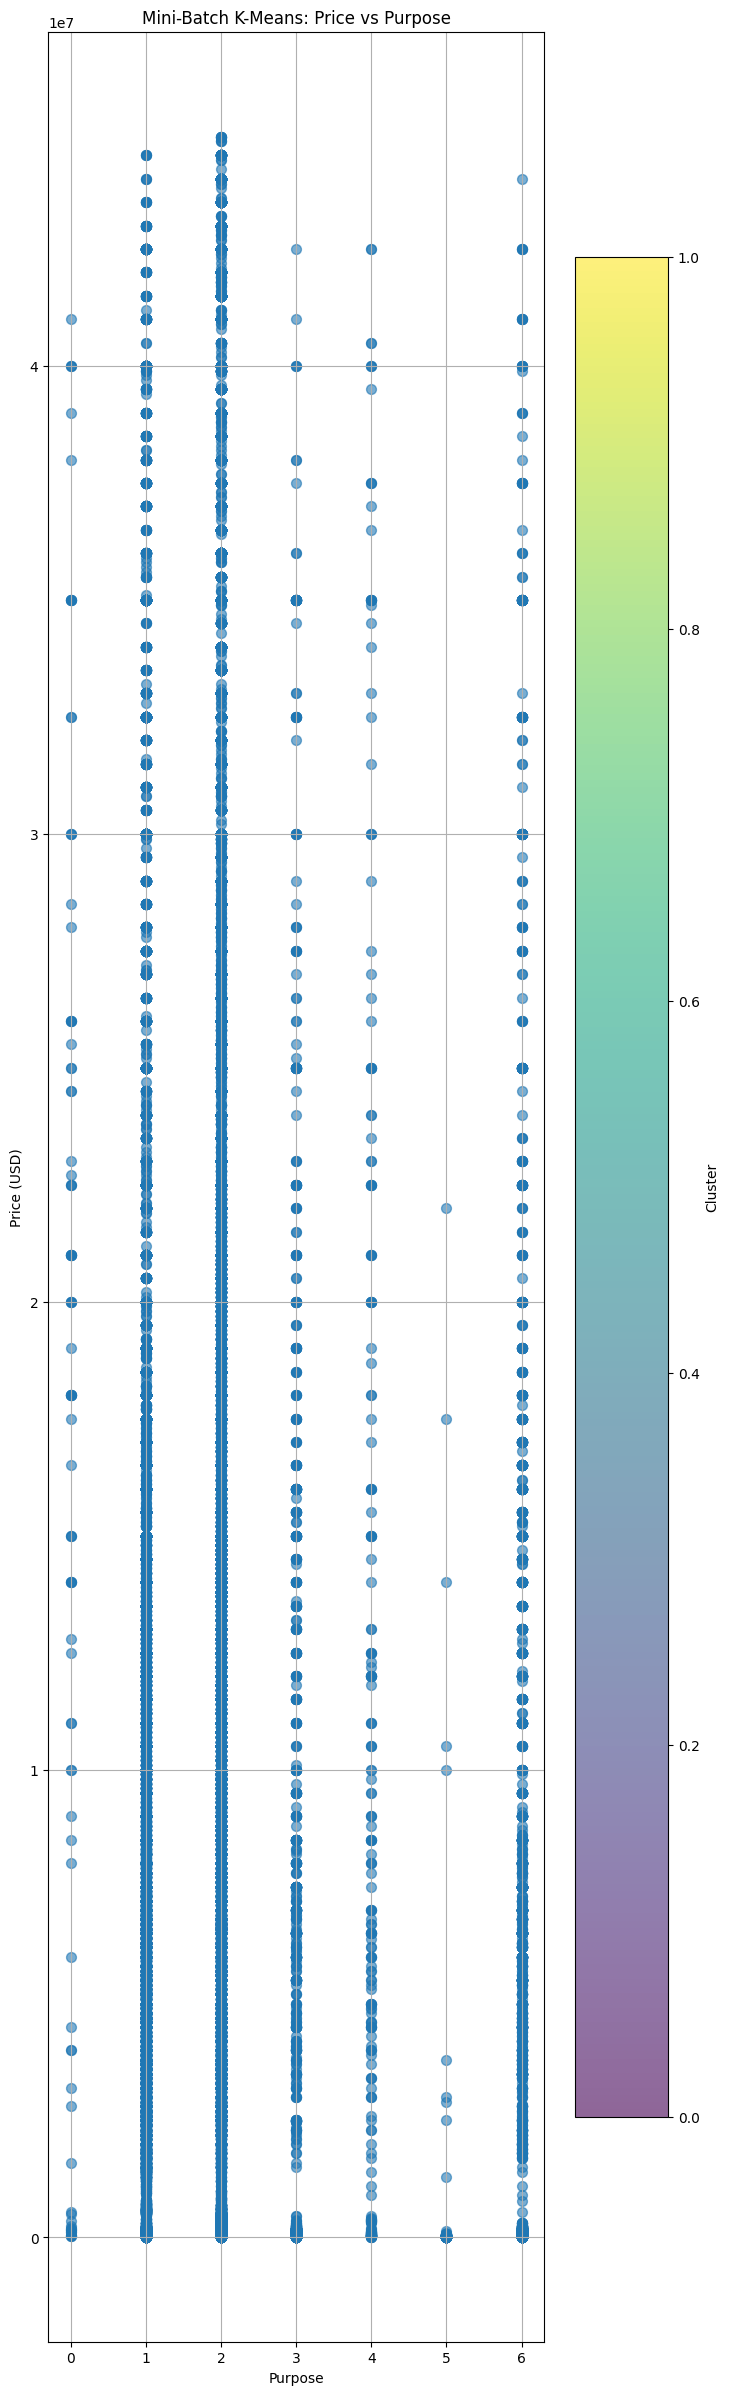

In [246]:
plt.figure(figsize=(8,30))
plt.scatter(df['property_type'], df['price'], cmap='viridis', s=50, alpha=0.6)
plt.title('Mini-Batch K-Means: Price vs Purpose')
plt.xlabel('Purpose')
plt.ylabel('Price (USD)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()